# Tutorials on how to get uhaf nodes with uhaf package

In [1]:
import sys
import os
import pandas as pd

In [2]:
import uhaf as uhaflib

ModuleNotFoundError: No module named 'uhaf'

In [20]:
uhaf = uhaflib.build_uhaf('uHAF2.1.6') # uHAF2.1.3, uHAF2.1.5, uHAF2.1.6

No sheetnames specified, generating uHAF for all organs


Generating uHAF: 100%|██████████| 52/52 [00:00<00:00, 73.39it/s]


In [22]:
len(uhaf.df_uhafs)

50

## Basic uHAF node tracing

track the target cell type, and get its all ancesters

In [26]:
uhaf.track_cell_from_uHAF(sheet_name='Lung',cell_type_target='CD8 T cell')

['Cell', 'Lymphocyte', 'T cell', 'CD8 T cell']

## Generate uHAF-GPTs prompts with given cell types

In [27]:
heart_meta_data = pd.read_csv('../tmp_test/heart_example_dataset_metadata.csv',index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '../tmp_test/heart_example_dataset_metadata.csv'

In [28]:
test_dataset_metadata = heart_meta_data[heart_meta_data['study_id'] == '10.1038/s41586-023-06311-1']

NameError: name 'heart_meta_data' is not defined

In [35]:
original_anno = test_dataset_metadata['original_name'].unique().tolist()[:40]

In [36]:
cmap = pd.crosstab(test_dataset_metadata.original_name, test_dataset_metadata.cell_type)
expert_map = {}
for idx in list(original_anno):
    target = cmap.loc[idx][cmap.loc[idx]>0].index.tolist()[0]
    expert_map[idx] = target

In [37]:
test_cell_type_list = original_anno[:40]

In [ ]:
print(uhaf.generate_uhaf_GPTs_prompts('Heart',test_cell_type_list))

# put the cell types into uHAF-GPTs (https://uhaf.unifiedcellatlas.org/#/uHAFMapping)

# you can copy the mapping dict to transfer your labels

NameError: name 'test_cell_type_list' is not defined

In [56]:
mapping_results_from_uHAFGPTs = {
    "EC5_art": "Artery endothelial cell",
    "SMC2_art": "Smooth muscle cell",
    "PC2_atria": "Pericyte",
    "EC6_ven": "Vein endothelial cell",
    "SMC1_basic": "Smooth muscle cell",
    "EC2_cap": "Capillary endothelial cell",
    "MoMP": "Monocyte-derived macrophage",
    "FB4_activated": "Activated fibroblast",
    "FB3": "Fibroblast",
    "EC4_immune": "Endothelial cell",
    "FB1": "Fibroblast",
    "LYVE1+IGF1+MP": "Macrophage",
    "EC3_cap": "Capillary endothelial cell",
    "EC1_cap": "Capillary endothelial cell",
    "PC1_vent": "Pericyte",
    "PC3_str": "Pericyte",
    "EC7_endocardial": "Endocardial cell",
    "CD14+Mo": "Monocyte",
    "LYVE1+TIMD4+MP": "Macrophage",
    "DC": "Dendritic cell",
    "unclassified": "Cell",
    "CD16+Mo": "Monocyte",
    "CD4+T_Th2": "CD4 T helper",
    "FB5": "Fibroblast",
    "MAIT-like": "MAIT cell",
    "NK_CD16hi": "NK cell",
    "CD8+T_trans": "CD8 T trans cell",
    "CD8+T_cytox": "Effector CD8 T cell",
    "NC1_glial": "Schwann cell",
    "PC4_CMC-like": "Pericyte",
    "CD4+T_act": "Activated CD4 T cell",
    "EC10_CMC-like": "Endothelial cell",
    "CD8+T_te": "CD8 T te cell",
    "EC8_ln": "Lymphatic endothelial cell",
    "CD4+T_naive": "Naive CD4 T cell",
    "Meso": "Mesothelial cell",
    "T/NK_cycling": "Lymphoid cell",
    "aCM4": "Ventricle cardiomyocyte cell",
    "LYVE1+MP_cycling": "Macrophage",
    "B_plasma": "Plasma B cell"
}


In [57]:
expert_map

{'EC5_art': 'Arterial endothelial cell',
 'SMC2_art': 'Smooth muscle cell',
 'PC2_atria': 'Pericyte',
 'EC6_ven': 'Venous endothelial cell',
 'SMC1_basic': 'Smooth muscle cell',
 'EC2_cap': 'Capillary endothelial cell',
 'MoMP': 'Monocyte-derived macrophage',
 'FB4_activated': 'Activated fibroblast',
 'FB3': 'Fibroblast',
 'EC4_immune': 'Lymphatic endothelial cell',
 'FB1': 'Fibroblast',
 'LYVE1+IGF1+MP': 'Macrophage',
 'EC3_cap': 'Capillary endothelial cell',
 'EC1_cap': 'Capillary endothelial cell',
 'PC1_vent': 'Pericyte',
 'PC3_str': 'Pericyte',
 'EC7_endocardial': 'Endocardial cell',
 'CD14+Mo': 'Monocyte',
 'LYVE1+TIMD4+MP': 'Macrophage',
 'DC': 'Dendritic cell',
 'unclassified': 'Unclassified',
 'CD16+Mo': 'Monocyte',
 'CD4+T_Th2': 'CD4 T helper',
 'FB5': 'Fibroblast',
 'MAIT-like': 'MAIT cell',
 'NK_CD16hi': 'NK cell',
 'CD8+T_trans': 'CD8 T trans cell',
 'CD8+T_cytox': 'Effector CD8 T cell',
 'NC1_glial': 'Neuroglial cell',
 'PC4_CMC-like': 'Pericyte',
 'CD4+T_act': 'Activated

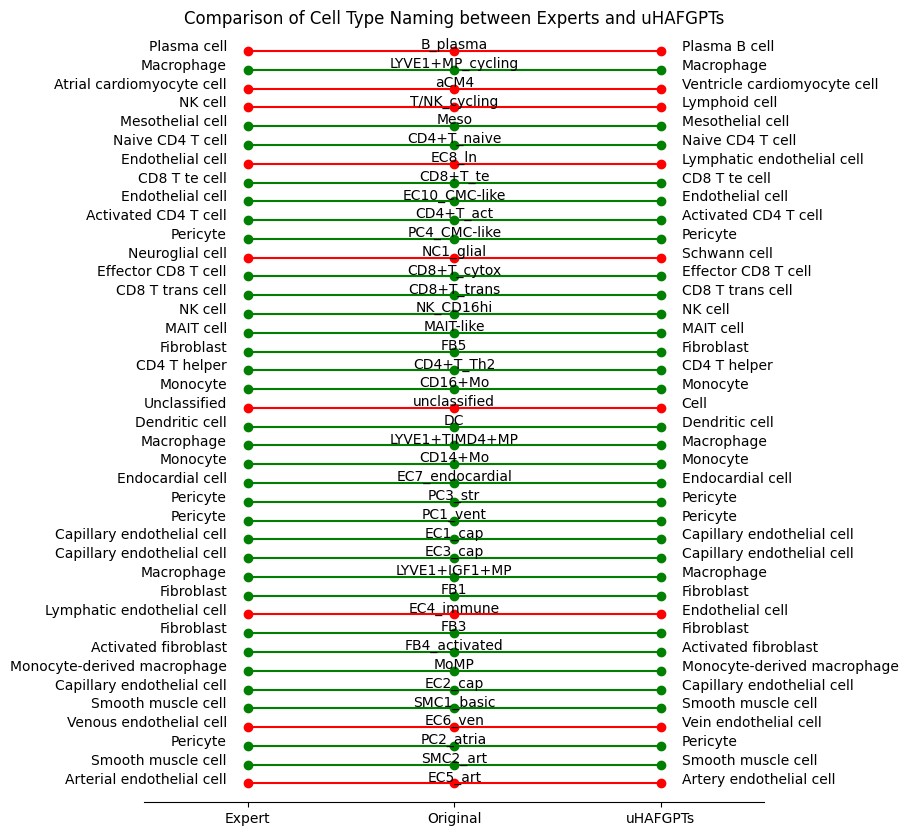

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# 示例字典数据
expert_dict = expert_map

uHAFGPTs_dict = mapping_results_from_uHAFGPTs

# 创建DataFrame
df = pd.DataFrame([(k, expert_dict[k], uHAFGPTs_dict[k]) for k in expert_dict.keys()], 
                  columns=['Original Cell Type', 'Expert Type', 'uHAFGPTs Type'])

# 计算颜色
df['Color'] = df.apply(lambda row: 'green' if row['Expert Type'] == row['uHAFGPTs Type'] else 'red', axis=1)

# 绘制可视化
fig, ax = plt.subplots(figsize=(8, 10))

# 对每个cell type绘制线
for i, row in df.iterrows():
    x = [0, 1, 2]
    y = [i, i, i]
    ax.plot(x, y, color=row['Color'], marker='o')
    
    # 添加文本标签
    ax.text(x[0] - 0.1, y[0], row['Expert Type'], ha='right')
    ax.text(x[1], y[1] + 0.1, row['Original Cell Type'], ha='center')
    ax.text(x[2] + 0.1, y[2], row['uHAFGPTs Type'], ha='left')

# 设置坐标轴
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-1, len(df))
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Expert', 'Original', 'uHAFGPTs'])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Comparison of Cell Type Naming between Experts and uHAFGPTs')
plt.show()


## Annotation level retreive from uHAF

In [28]:
annotation_level = 1 
# 1: main cell type level; 
# 2: middle cell type level; 
# 3: fine cell type level (query cell types themselves)));


In [22]:
# you should use mapped cell types from uHAF-GPTs to replace the original cell types in the dataset metadata, and use them here:
example_cell_types = ['Cytotoxic CD4 T cell', 'Myofibroblast',
 'Basement membrane fibroblast',
 'Adventitial fibroblast',
 'Pericyte',
 'Macrophage',
 'Monocyte-derived macrophage',
 'Monocyte',
 'Dendritic cell',]

organ = 'Heart'

In [24]:
cut_level_annotations_MCT = uhaf.set_annotation_level(example_cell_types, 
                                                  sheet_name = 'Heart', 
                                                  annotation_level = annotation_level)

In [25]:
cut_level_annotations_fine = uhaf.set_annotation_level(example_cell_types, 
                                                  sheet_name = 'Heart', 
                                                  annotation_level = 3)

In [26]:
cut_level_annotations_MCT

{'Cytotoxic CD4 T cell': 'Lymphoid cell',
 'Myofibroblast': 'Fibroblast',
 'Basement membrane fibroblast': 'Fibroblast',
 'Adventitial fibroblast': 'Fibroblast',
 'Pericyte': 'Fibroblast',
 'Macrophage': 'Myeloid cell',
 'Monocyte-derived macrophage': 'Myeloid cell',
 'Monocyte': 'Myeloid cell',
 'Dendritic cell': 'Myeloid cell'}

In [27]:
cut_level_annotations_fine

{'Cytotoxic CD4 T cell': 'Cytotoxic CD4 T cell',
 'Myofibroblast': 'Myofibroblast',
 'Basement membrane fibroblast': 'Basement membrane fibroblast',
 'Adventitial fibroblast': 'Adventitial fibroblast',
 'Pericyte': 'Pericyte',
 'Macrophage': 'Macrophage',
 'Monocyte-derived macrophage': 'Monocyte-derived macrophage',
 'Monocyte': 'Monocyte',
 'Dendritic cell': 'Dendritic cell'}

## Generate uHAF-T in nest json/dict format

In [55]:
print(uhaf.dict_uhafs['Heart'])

{'Cell': {'Adipocyte': {'Unilocular adipocyte': {}, 'Multilocular adipocyte': {}}, 'Cardiomyocyte cell': {'Ventricle cardiomyocyte cell': {}, 'Atrial cardiomyocyte cell': {}, 'conduction-system cell': {'Purkinje cell': {}, 'Sinoatrial node P cell': {}, 'Atrioventricular node bundle cell': {}, 'Atrioventricular node P cell': {}}}, 'Endothelial cell': {'Lymphatic endothelial cell': {}, 'Vascular endothelial cell': {'Artery endothelial cell': {}, 'Capillary endothelial cell': {}, 'Vein endothelial cell': {}}, 'Endocardial cell': {}}, 'Mesothelial cell': {}, 'Fibroblast': {'Activated fibroblast': {}, 'Fibrocyte': {}}, 'Smooth muscle cell': {}, 'Pericyte': {}, 'Lymphoid cell': {'T cell': {'CD4 T cell': {'Activated CD4 T cell': {}, 'Naive CD4 T cell': {}, 'Regulatory CD4 T cell': {}, 'CD4 T helper': {}}, 'CD8 T cell': {'Memory CD8 T cell': {}, 'Effector CD8 T cell': {}, 'CD8 T te cell': {}, 'CD8 T trans cell': {}}, 'NK T cell': {}, 'MAIT cell': {}, 'gdT': {}}, 'B cell': {'Plasma B cell': {}}

In [59]:
print(uhaf.dict_uhafs['Lung'])

{'Cell': {'Endothelial cell': {'Capillary endothelial cell': {}, 'Vein endothelial cell': {}, 'Lymphatic endothelial cell': {}, 'Artery endothelial cell': {}, 'Aerocyte': {}, 'Tip cell': {}, 'Stalk cell': {}}, 'Acinar cell': {}, 'Chondrocyte': {}, 'Neuroendocrine cell': {}, 'Submucosal gland cell': {}, 'Epithelial cell': {'Tuft cell': {}, 'Secretory cell': {}, 'Goblet cell': {}, 'Alveolar cell': {'Type I alveolar cell': {}, 'Type II alveolar cell': {}}, 'Ciliated cell': {}, 'Basal cell': {}, 'Ionocyte cell': {}, 'Epithelial progenitor cell': {}, 'Squamous cell': {}, 'FOXN4+ cell': {}, 'Deuterosomal cell': {}, 'Brush cell': {}}, 'Myeloid cell': {'Mast cell': {}, 'Neutrophilic granulocyte': {}, 'Eosinophilic granulocyte': {}, 'Basophilic granulocyte': {}, 'Promyelocyte': {}, 'Dendritic cell': {'Conventional dendritic cell': {}, 'Plasmacytoid dendritic cell': {}, 'Mature dendritic cell': {}, 'Migratory dendritic cell': {}}, 'Monocyte': {'Classical monocyte': {}, 'Non-classical monocyte': 

In [60]:
print(uhaf.dict_uhafs['Liver'])

{'Cell': {'Lymphoid cell': {'T cell': {'NK T cell': {}, 'CD4 T cell': {}, 'CD8 T cell': {}}, 'NK cell': {}, 'B cell': {'Plasma B cell': {}}}, 'Myeloid cell': {'Kupffer cell': {}, 'Monocyte': {}, 'Dendritic cell': {'Plasmacytoid dendritic cell': {}, 'Conventional dendritic cell': {'Migratory conventional dendritic cell': {}, 'Conventional dendritic cell 1': {}, 'Conventional dendritic cell 2': {}}}, 'Granulocyte': {'Neutrophilic granulocyte': {}}, 'Mast cell': {}}, 'Hepatic stellate cell': {}, 'Pericyte': {}, 'Endothelial cell': {'Sinusoidal endothelial cell': {}, 'Vascular endothelial cell': {}}, 'Cholangiocyte': {}, 'Hepatocyte': {}}}


In [61]:
print(uhaf.dict_uhafs['Bone marrow'])

{'Cell': {'Endothelial cell': {'Vascular endothelial cell': {}, 'Lymphatic endothelial cell': {}}, 'Epithelial cell': {'Perineural epithelial cell': {}}, 'Mesenchymal cell': {'Chondrocyte': {}, 'Osteoblast': {}}, 'Stromal cell': {'Fibroblast': {'Myofibroblast': {}, 'Fibroblastic synovial cell (Type B cell)': {}, 'Fibrocyte': {}, 'Pericyte': {}}, 'Adipocyte': {}}, 'Myeloid cell': {'Dendritic cell': {'Monocyte derived dendritic cell': {}, 'Plasmacytoid dendritic cell': {}, 'Pre conventional dendritic cell': {'Conventional dendritic cell': {'Conventional dendritic cell 1': {}, 'Conventional dendritic cell 2': {}}}}, 'Monocyte': {}, 'Macrophage': {}, 'Megakaryocyte': {}, 'Erythrocyte': {}, 'Granulocyte': {'Eosinophilic granulocyte': {}, 'Neutrophilic granulocyte': {}, 'Basophilic granulocyte': {}, 'Mast cell': {}}}, 'Lymphoid cell': {'B cell': {'Plasmablast': {}, 'Plasma B cell': {}, 'Memory B cell': {}, 'Naive B cell': {}}, 'T cell': {'CD8 T cell': {'Naive CD8 T cell': {}, 'Memory CD8 T c

In [62]:
print(uhaf.dict_uhafs['Blood'])

{'Cell': {'Myeloid cell': {'Erythrocyte': {}, 'Platelet': {}, 'Basophilic granulocyte': {}, 'Eosinophilic granulocyte': {}, 'Mast cell': {}, 'Monocyte': {}, 'Megakaryocyte': {}, 'Dendritic cell': {'Conventional dendritic cell': {}, 'Plasmacytoid dendritic cell': {}}, 'Macrophage': {}}, 'Haematopoietic stem and progenitor cell': {'Haematopoietic stem cell': {}, 'Multipotent progenitor (MPP)': {'Multipotent hematopoietic progenitor': {'Common myeloid progenitor (CMP)': {'Megakaryocyte-erythrocyte progenitor (MEP)': {'Erythroblast': {}, 'Megakaryocytic progenitor cell': {}, 'Erythroid progenitor cell': {}}, 'Granulocyte-monocyte progenitor (GMP)': {'Monocyte-dendritic progenitor (MDP)': {}, 'Neutrophilic myelocyte': {}}}}, 'Multipotent lymphoid progenitor (MLP)': {'Common lymphoid progenitor (CLP)': {'Pro-B cell': {}, 'Pre-B cell': {}, 'Early T-cell precursor': {}, 'PreBNK': {}}}}}, 'Lymphoid cell': {'NK cell': {}, 'B cell': {'Naive B cell': {}, 'Memory B cell': {}, 'Plasma B cell': {}}, 